# Employee Performance Model Creation
### INX Future Inc.

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading dataset
data1=pd.read_csv("E:\\Data Mites\\MyProject\\IABAC Project\\ProjectDir\\data\\processed\\DummiesFile.csv")

In [5]:
data1.shape

(1200, 60)

In [6]:
data1

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,...,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely
0,32,10,3,4,55,3,2,4,1,0,...,0,1,0,0,0,0,0,0,0,1
1,47,14,4,4,42,3,2,1,2,0,...,0,1,0,0,0,0,0,0,0,1
2,40,5,4,4,48,2,3,1,5,1,...,0,1,0,0,0,0,0,0,1,0
3,41,10,4,2,73,2,5,4,3,0,...,0,0,0,0,0,0,0,0,0,1
4,60,16,4,1,84,3,2,1,8,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,1,4,71,4,2,4,1,1,...,0,1,0,0,0,0,0,0,1,0
1196,37,10,2,4,80,4,1,4,3,0,...,0,0,0,1,0,0,0,0,0,1
1197,50,28,1,4,74,4,1,3,1,1,...,0,0,0,1,0,0,0,0,0,1
1198,34,9,3,4,46,2,3,2,1,0,...,0,0,0,0,0,0,0,0,0,1


### Outliers

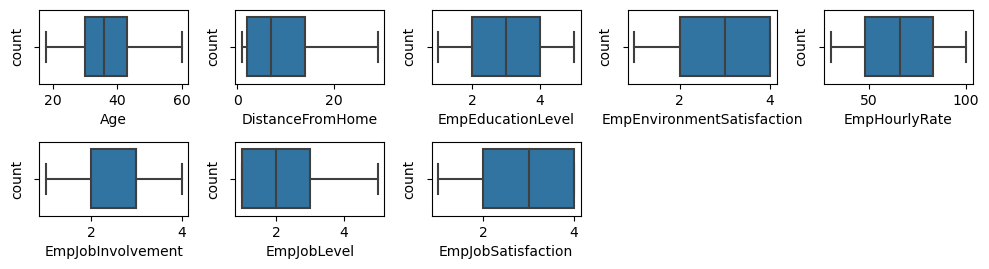

In [7]:
# checking Outliers 
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in data1.drop('PerformanceRating',axis=1):
    if plotnumber<9:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(x=data1[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

### Feture Selection

In [8]:
data1.corr()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,...,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,0.051910,...,-0.048561,-0.018004,-0.175906,-0.002592,0.005966,-0.024610,0.033584,-2.293464e-02,-0.033992,0.044678
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.024940,...,-0.004065,0.024471,-0.029538,0.030235,0.028001,-0.001554,-0.010074,4.044274e-02,-0.028573,-0.003420
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,-0.021119,...,0.013938,0.059322,-0.104893,-0.040823,0.047522,-0.002595,-0.017851,8.140459e-03,-0.016728,0.008658
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,0.064270,...,0.002748,-0.033454,-0.011140,0.055478,-0.018835,0.040043,0.047139,-1.197124e-03,-0.019519,0.017441
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.032636,...,-0.008684,-0.029836,-0.010053,-0.012165,-0.021431,-0.055720,0.022542,-1.695070e-02,-0.017095,0.026186
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.011069,...,-0.006439,-0.018492,-0.037905,0.034471,-0.010346,0.013597,0.055183,-4.739899e-02,0.047272,-0.007729
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,0.030012,...,-0.184863,0.123940,-0.218709,-0.001885,-0.000085,-0.044196,-0.015320,-2.623964e-02,-0.021289,0.036130
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.022315,...,0.020388,0.018543,-0.001765,0.014543,-0.006731,-0.001268,0.018012,1.285168e-02,0.033905,-0.037686
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.013888,...,-0.025081,-0.008529,-0.108600,0.010645,0.021347,-0.042803,0.068886,-4.078605e-03,-0.030979,0.029175
OverTime,0.051910,0.024940,-0.021119,0.064270,-0.032636,-0.011069,0.030012,0.022315,-0.013888,1.000000,...,0.032458,0.006898,-0.025905,0.051228,-0.039711,0.022594,-0.012306,-5.745570e-02,0.036242,0.008562


In [9]:
plt.figure(figsize=(190,120))
sns.heatmap(data1.drop('PerformanceRating',axis=1).corr(),annot=True)

<Axes: >

### Model Creation

In [10]:
data1

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,...,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely
0,32,10,3,4,55,3,2,4,1,0,...,0,1,0,0,0,0,0,0,0,1
1,47,14,4,4,42,3,2,1,2,0,...,0,1,0,0,0,0,0,0,0,1
2,40,5,4,4,48,2,3,1,5,1,...,0,1,0,0,0,0,0,0,1,0
3,41,10,4,2,73,2,5,4,3,0,...,0,0,0,0,0,0,0,0,0,1
4,60,16,4,1,84,3,2,1,8,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,1,4,71,4,2,4,1,1,...,0,1,0,0,0,0,0,0,1,0
1196,37,10,2,4,80,4,1,4,3,0,...,0,0,0,1,0,0,0,0,0,1
1197,50,28,1,4,74,4,1,3,1,1,...,0,0,0,1,0,0,0,0,0,1
1198,34,9,3,4,46,2,3,2,1,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
# creating data into x and y
x=data1.drop('PerformanceRating',axis=1)
y=data1[['PerformanceRating']]

In [12]:
# creating data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

### PCA
   - Use Case: PCA can be used as part of the modeling process to reduce overfitting and improve the generalization performance of the model.
   - Steps: Apply PCA to the training data before fitting the model. This can help reduce the dimensionality of the feature space and remove noise or irrelevant features.

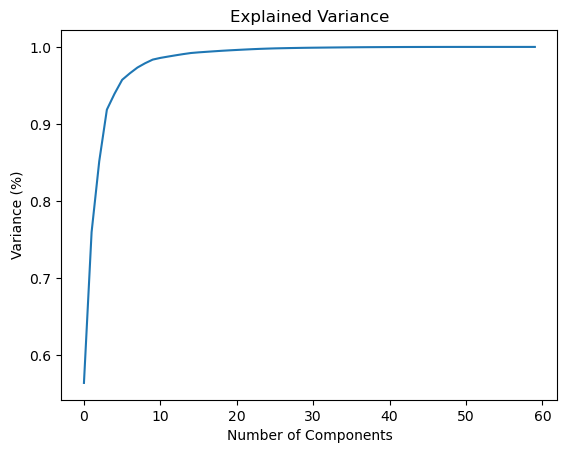

In [13]:
## getting the optimal number of pca
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(data1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

### Decision Tree

In [14]:
## Balacing the data
# SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address class imbalance in machine learning datasets. It's commonly applied to classification problems where one class (the minority class) is significantly underrepresented compared to another class (the majority class).
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()
x_smote,y_smote=sm.fit_resample(x_train,y_train)

In [15]:
print("actual",Counter(y_train))
print("after smote",Counter(y_smote))

actual Counter({'PerformanceRating': 1})
after smote Counter({'PerformanceRating': 1})


In [16]:
# creating decision tree model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier() # model 
dtree.fit(x_smote,y_smote)
y_predic=dtree.predict(x_test)

In [17]:
y_train_predict=dtree.predict(x_train)#predicting training data to check training performance 
y_train_predict

array([4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 3, 4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 4, 2, 3, 2, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 4, 2, 2, 2, 3, 4, 4, 2, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 4, 3, 3, 2, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3,
       2, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 4, 3, 2, 3, 2, 3,
       3, 4, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 4, 2, 3, 2, 4,
       3, 3, 2, 3, 3, 4, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 2, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 2, 4, 3, 2, 3, 3, 3, 3, 2,

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
decisiontree_score=accuracy_score(y_train,y_train_predict)
decisiontree_score

1.0

In [19]:
print("The Accuracy score we achive using decision tree algorithm is :",decisiontree_score)

The Accuracy score we achive using decision tree algorithm is : 1.0


In [20]:
actual_value=y_test.copy()
actual_value
actual_value['pred']=y_predic
# Now we are trying to save these to diffrent name file.
actual_value.to_csv('decisiontree_Accu.csv', index=False)

### Apply Random Forest

In [21]:
# creating
from sklearn.ensemble import RandomForestClassifier
RForest=RandomForestClassifier()
RForest.fit(x_smote,y_smote)
y_pred=RForest.predict(x_test)

In [22]:
accuracy_score(y_test,y_pred)

0.9055555555555556

### HyperParameter Tunning For Random Forest

In [23]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] 

In [24]:
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',
                           param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_smote, y_smote)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")
 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True})


In [25]:
rf_clf2 = RandomForestClassifier(n_estimators= 100, min_samples_split=2, min_samples_leaf= 1, max_features='auto', max_depth=20, bootstrap=False)#passing best parameter to randomforest
rf_clf2.fit(x_smote,y_smote)
y_predict=rf_clf2.predict(x_test)


In [26]:
# training accuracy
y_train_pred=rf_clf2.predict(x_train)

In [27]:
# testing accuracy
randomforest_score=accuracy_score(y_test,y_predict)
randomforest_score

0.9111111111111111

In [28]:
# training accuracy
accuracy_score(y_train,y_train_pred)

1.0

In [29]:
print("The Accuracy score we achive using random forest is :",randomforest_score)

The Accuracy score we achive using random forest is : 0.9111111111111111


In [30]:
actual_value=y_test.copy()
actual_value
actual_value['pred']=y_predict
# Now we are trying to save these to diffrent name file.
actual_value.to_csv('RadondomF_Accu.csv', index=False)

### Apply SVM

In [31]:
# Support Vector Classifier Model
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_smote, y_smote)

SVC()

In [32]:
# Predict output for X_test
y_pred=svclassifier.predict(x_test)

In [33]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.6333333333333333

In [34]:
#f1_score(y_test,y_pred)

In [35]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.28      0.45      0.34        56
           3       0.85      0.65      0.74       260
           4       0.46      0.75      0.57        44

    accuracy                           0.63       360
   macro avg       0.53      0.62      0.55       360
weighted avg       0.71      0.63      0.66       360



In [36]:
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [37]:
#grid search CV
from sklearn.model_selection import GridSearchCV

# define hyperparameter range 
param_grid={'C':[0.1,5,10,50,60,70],'gamma':[1,0.1,0.01,0.001,0.001],'random_state':list(range(1,5))}

model=SVC()
grid=GridSearchCV(model,param_grid,verbose=2,scoring='f1',cv=5)
grid.fit(x,y)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.3s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.3s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.3s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.3s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.3s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.3s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.3s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.3s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.3s
[CV] END .....................C=0.1, gamma=1, 

[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.3s
[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.4s
[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.3s
[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.4s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.5s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.4s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.4s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.3s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.3s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.3s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.3s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.3s
[CV] END ...................

[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.1s
[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.1s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.1s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.1s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.1s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.1s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.1s
[CV] END ...................

[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ......................C=60, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.1s
[CV] END ...................

[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001],
                         'random_state': [1, 2, 3, 4]},
             scoring='f1', verbose=2)

In [38]:
print(grid.best_params_)

{'C': 0.1, 'gamma': 1, 'random_state': 1}


In [39]:
model=SVC(C=70,gamma=0.01,random_state=1)
model.fit(x_smote,y_smote)

SVC(C=70, gamma=0.01, random_state=1)

In [40]:
y_pred=model.predict(x_test)

In [41]:
Accuracy_SVC=accuracy_score(y_test,y_pred)
Accuracy_SVC

0.7527777777777778

In [42]:
print("The Accuracy score we achive using Super vecter Machin algorithm is :",Accuracy_SVC)

The Accuracy score we achive using Super vecter Machin algorithm is : 0.7527777777777778


In [43]:
actual_value=y_test.copy()
actual_value
actual_value['pred']=y_pred
# Now we are trying to save these to diffrent name file.
actual_value.to_csv('SuperVecterMachine_Accu.csv', index=False)

In [44]:
actual_value

,PerformanceRating,pred
1049,3,3
476,2,3
61,3,3
910,4,3
68,4,4
...,...,...
1044,3,3
677,3,3
351,3,3
882,3,2


### Apply Gradient Boosting Algorithm

In [45]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier
GradientB=GradientBoostingClassifier() ## object creation
GradientB.fit(x_train,y_train) ## fitting the data
y_gbm=GradientB.predict(x_test)#predicting the price

In [46]:
## evaluatin the model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report# to check model performance
GradientB_score=accuracy_score(y_test,y_gbm)
GradientB_score

0.9388888888888889

In [47]:
print("The Accuracy score we achive using gradient bossting is :",GradientB_score)

The Accuracy score we achive using gradient bossting is : 0.9388888888888889


In [48]:
actual_value=y_test.copy()
actual_value
actual_value['pred']=y_gbm
# Now we are trying to save these to diffrent name file.
actual_value.to_csv('GBoost_Accu.csv', index=False)

### K-neighbour (KNN)

In [49]:
# Import KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
# Create empty list to store error values
error_rate = []

for i in range(1, 11):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train, y_train)
    y_pred = KNN.predict(x_test)
    
    # Convert y_test to Series and then apply .ravel()
    error_rate.append(np.mean(y_pred != y_test.iloc[:, 0].ravel()))  # Assuming the target column is the first column

error_rate

[0.36666666666666664,
 0.3972222222222222,
 0.33055555555555555,
 0.33611111111111114,
 0.2861111111111111,
 0.28888888888888886,
 0.275,
 0.28888888888888886,
 0.275,
 0.275]

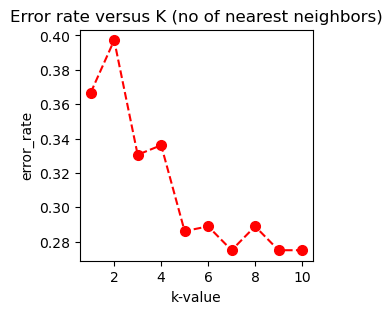

In [50]:
plt.figure(figsize=(3,3))
plt.plot(range(1,11),error_rate,color="red",linestyle="dashed",marker='o',markersize=7)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

In [51]:
# Import KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
# Create empty list to store error values
error_rate = []

for i in range(1, 11):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train, y_train)
    y_pred = KNN.predict(x_test)
    
    # Convert y_test to Series and then apply .ravel()
    error_rate.append(np.mean(y_pred != y_test.iloc[:, 0].ravel()))  # Assuming the target column is the first column

error_rate

[0.36666666666666664,
 0.3972222222222222,
 0.33055555555555555,
 0.33611111111111114,
 0.2861111111111111,
 0.28888888888888886,
 0.275,
 0.28888888888888886,
 0.275,
 0.275]

In [52]:
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

In [53]:
# accuracy score
KNN_score=accuracy_score(y_test,y_pred)
KNN_score

0.725

In [54]:
print("The Accuracy score we achive using K-Neighbors is :",KNN_score)

The Accuracy score we achive using K-Neighbors is : 0.725


In [55]:
actual_value=y_test.copy()
actual_value
actual_value['pred']=y_pred
# Now we are trying to save these to diffrent name file.
actual_value.to_csv('KNN_Accu.csv', index=False)

### Using Deep Learning

In [56]:
## Scaling the data as the magnitude of variables are varying lot
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
sclaed_x=sc.fit_transform(x) ## transforming the data
X = pd.DataFrame(sclaed_x,columns=x.columns) ##converting the arrays

### ANN (Artificial Neural Network)

In [57]:
## model creation
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2) ## model object creation max_iter=Stopping parameter
ANN.fit(x_train,y_train) ## training the data
y_predict_proba = ANN.predict_proba(x_test) ## predicting the pro
## bability of class
y_predict = ANN.predict(x_test)
y_train_predict = ANN.predict(x_train)

In [58]:
y_train_predict

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [59]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_train_predict))
ANN_score=accuracy_score(y_test,y_predict)
print("Test accuracy :",ANN_score)

Train accuracy : 0.7309523809523809
Test accuracy : 0.7222222222222222


In [60]:
print("The Accuracy score we achive using artificial nural network is :",ANN_score)

The Accuracy score we achive using artificial nural network is : 0.7222222222222222


In [61]:
actual_value=y_test.copy()
actual_value
actual_value['pred']=y_predict
# Now we are trying to save these to diffrent name file.
actual_value.to_csv('ANN_Acc.csv', index=False)

# Conclusion 

In [62]:
accuracy_scores = [decisiontree_score,randomforest_score,Accuracy_SVC,GradientB_score,KNN_score,ANN_score]
algorithms = ["Decision Tree","Random Forest","Supper Vector Machine","Gradient Boosting","K-Nearest Neighbors","Artificial Nueral Network"]   

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(accuracy_scores[i])+" %")

The accuracy score achieved using Decision Tree is: 1.0 %
The accuracy score achieved using Random Forest is: 0.9111111111111111 %
The accuracy score achieved using Supper Vector Machine is: 0.7527777777777778 %
The accuracy score achieved using Gradient Boosting is: 0.9388888888888889 %
The accuracy score achieved using K-Nearest Neighbors is: 0.725 %
The accuracy score achieved using Artificial Nueral Network is: 0.7222222222222222 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

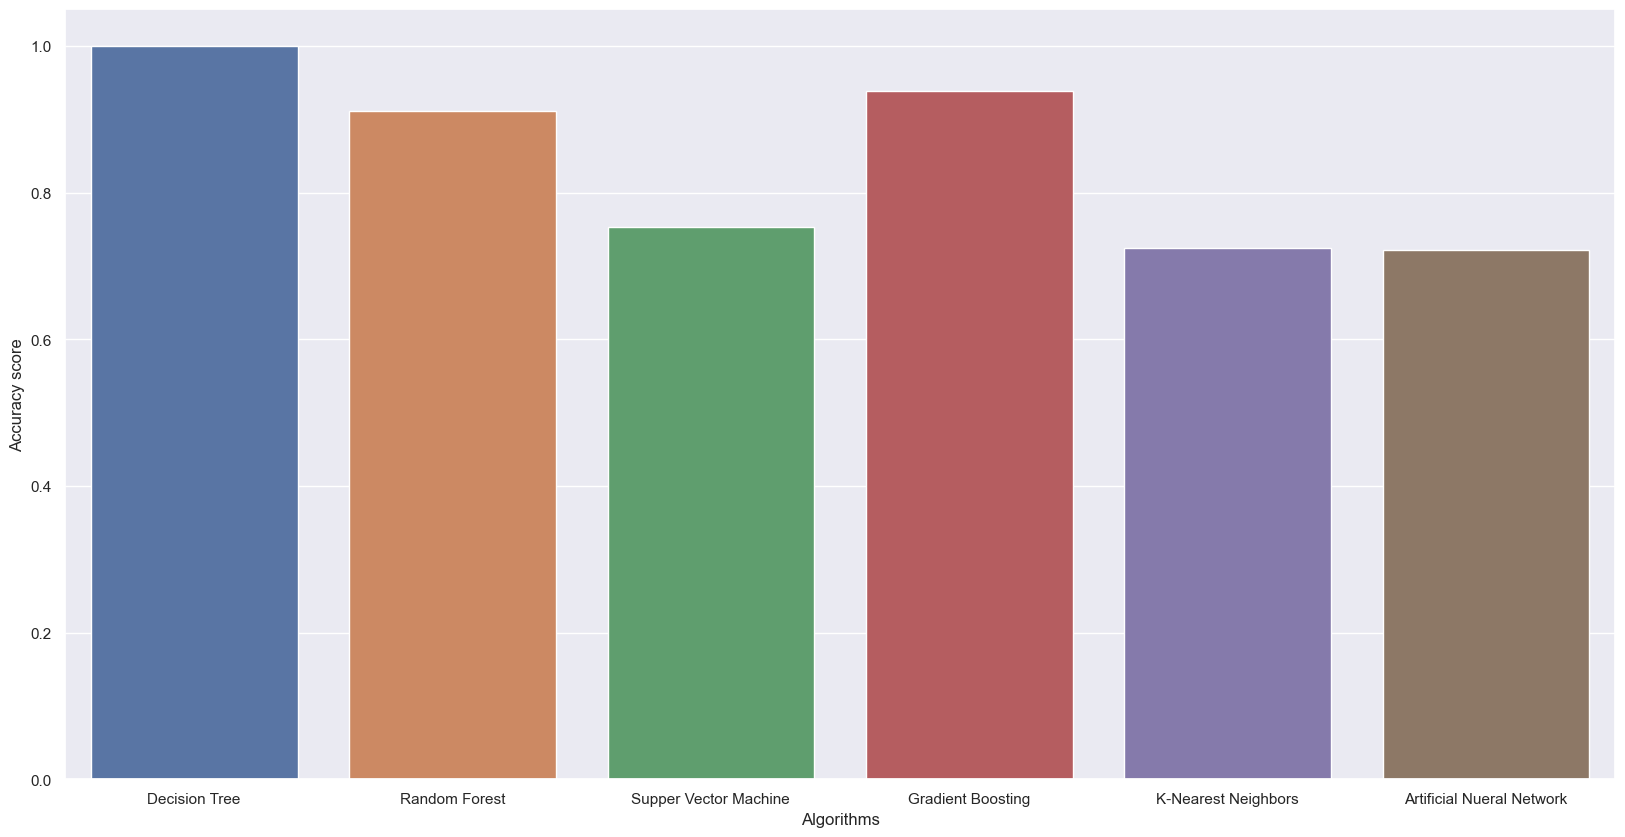

In [63]:
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=accuracy_scores)

### Conclusion and  Recommendation

* Within all the five models Three model gives more accuracy score followed closely by K-Nearest Neighbors and ANN
* While ANN had the lowest performance.
* ie; Here the best model is 
  * 1.Decision Tree
  * 2.Random Forest
  * 3.Gradient Boosting
  * 4.XG-Boost 
  
### so we have to go with  1.Decision Tree Random Forestprediction 

- Read file of 
  * 1.Decision Tree
  * 2.Random Forest

Establish measurable goals and milestones to track progress.
Clearly define performance expectations and objectives for the employee.
Collaborate with the employee to develop a personalized action plan for development.
When discussing performance improvement with an employee, it's crucial to maintain a respectful and constructive dialogue. Focus on providing support, guidance, and opportunities for growth to help the employee reach their full potential. Because 


In conclusion, this project has provided valuable insights into which factors influencing employee performance,
with implications for devloper and senior devloper Moving forward, 
it is essential to hire employee according to model file (In Which I saved the model). have to hire more employee who left job in department.

# Thank You